In [1]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
stocks = 'AMZN FB IBM MMM'
stocks = stocks.split()
data = yf.download(stocks,'2014-02-01')['Adj Close'] #download stock close and put in data


[*********************100%***********************]  4 of 4 downloaded


<Figure size 432x288 with 0 Axes>

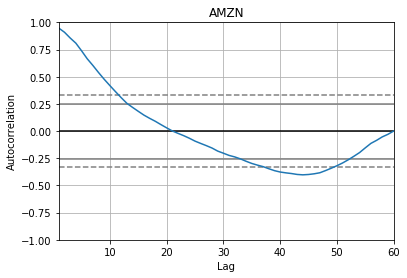

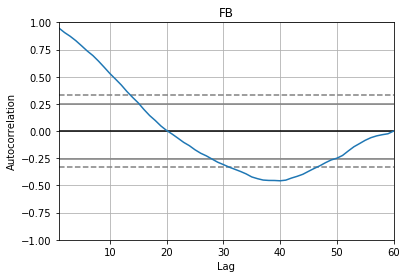

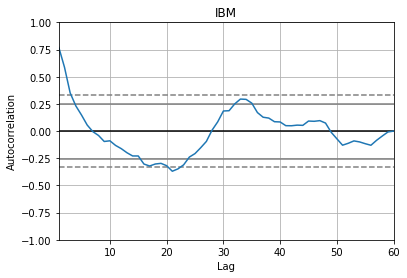

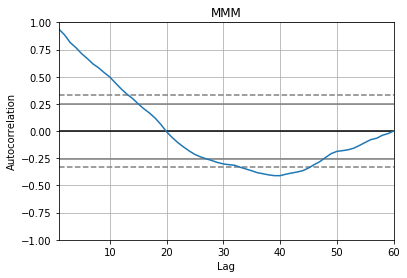

<Figure size 432x288 with 0 Axes>

In [2]:
data = data.asfreq('BM', method = 'ffill') #select the close value at business month end
#correlation plots for each stock

autocorrelation_plot(data['AMZN']) 
plt.title('AMZN')
plt.figure()
autocorrelation_plot(data['FB'])
plt.title('FB')
plt.figure()
autocorrelation_plot(data['IBM'])
plt.title('IBM')
plt.figure()
autocorrelation_plot(data['MMM'])
plt.title('MMM')
plt.figure()


<Figure size 432x288 with 0 Axes>

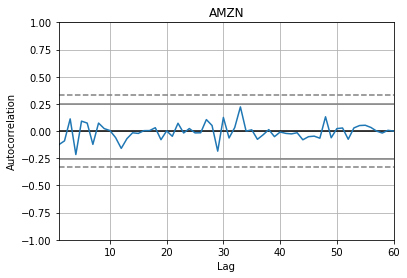

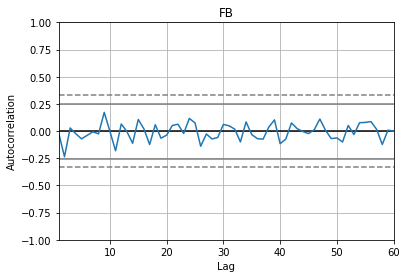

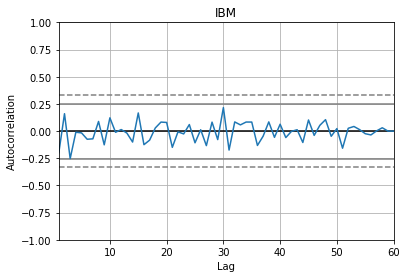

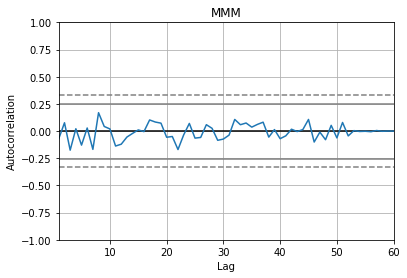

<Figure size 432x288 with 0 Axes>

In [3]:
returns = 100*(data.shift(-1)/data - 1)#calculate the monthly return for each stock using shift trick
returns=returns.fillna(0) #fill Nan value
#correlation plots for stock returns
autocorrelation_plot(returns['AMZN'])
plt.title('AMZN')
plt.figure()
autocorrelation_plot(returns['FB'])
plt.title('FB')
plt.figure()
autocorrelation_plot(returns['IBM'])
plt.title('IBM')
plt.figure()
autocorrelation_plot(returns['MMM'])
plt.title('MMM')
plt.figure()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212b3d68>,
      dtype=object)

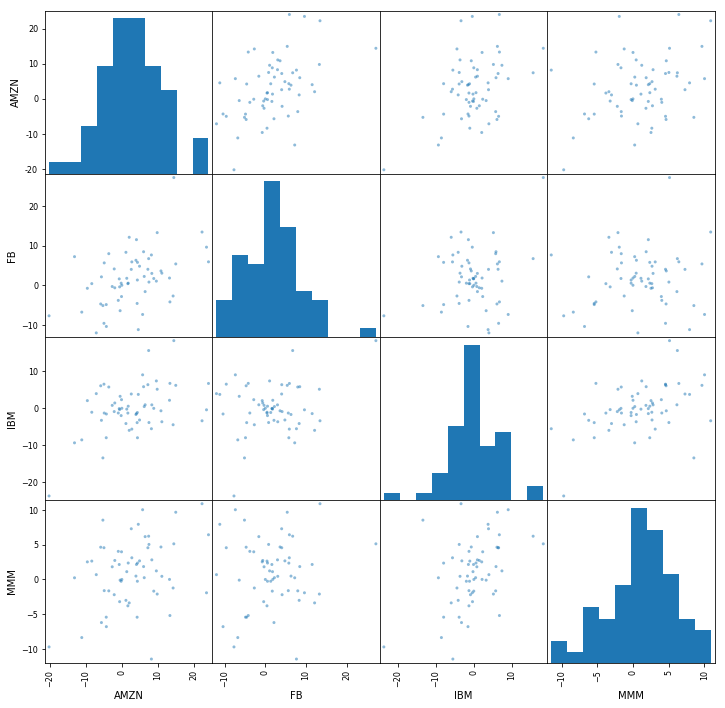

In [4]:
scatter_matrix(returns, figsize=(12,12))

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


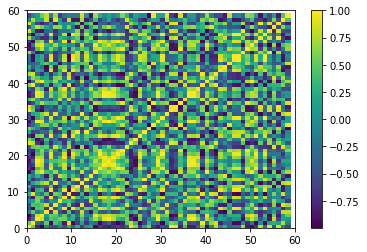

In [5]:
R = corrcoef(returns)
pcolor(R)
colorbar()
show()